In [40]:
import geopandas
import matplotlib.pyplot as plt

gdf = geopandas.read_file("example_dataset.geojson")
#Перетворення геометрії таблиці на проекційну систему координат
gdf = gdf.to_crs(epsg=32635) 
#Кількість полів, які засіяні не квітні
sowing_date_list = gdf['sowing_date'].tolist()
filtered_list = list(filter(lambda x: not '-04-' in x, sowing_date_list))
print(f'The number of fields that were not sown in April: {len(filtered_list)}')
print(filtered_list)

The number of fields that were not sown in April: 421
['2016-05-02', '2016-05-02', '2016-05-03', '2016-05-03', '2016-05-05', '2016-05-05', '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-07', '2016-05-21', '2016-05-21', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-01', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-02', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-03', '2017-05-04', '2017-05-04', '2017-05-04', '2017-05-04', '2017-05-04', '2017-0

#Посилання на GitHub -> https://github.com/konopl1tsky1/geo_data_analisis/blob/main/Lab_04/lab_04.ipynb

In [41]:
#Відносна похибка
gdf['relative_error'] = abs((gdf['actual_yield'] - gdf['model_yield']) / gdf['actual_yield'])
gdf.head(3)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((585217.656 5449710.777, 585195...",0.115696
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((522480.737 5413643.268, 522491...",0.052785


In [42]:
#Поля, які ммають айбільшу та найменшу відносні похибки
max_error = gdf.loc[gdf['relative_error'].idxmax()]
min_error = gdf.loc[gdf['relative_error'].idxmin()]

print("The field with the largest relative error:")
print(max_error)
print("\nThe field with the smallest relative error:")
print(min_error)

The field with the largest relative error: crop_name                                                       maiz
sowing_date                                               2017-04-28
actual_yield                                                  1500.0
field_id                                                KI_VN_08_405
avg_temperature                                            11.707561
avg_rainfall                                              641.750403
model_yield                                                   6262.0
geometry           MULTIPOLYGON (((677861.5817398769 5345023.7963...
relative_error                                              3.174667
Name: 213, dtype: object


The field with the smallest relative error: crop_name                                                        soy
sowing_date                                               2018-05-09
actual_yield                                                  2600.0
field_id                                               KI_

In [43]:
#Додавання колонок геметрії центроїдів та площі поля
gdf['geometry_of_centroid'] = gdf['geometry'].centroid.apply(lambda x: f'POINT({x.x}, {x.y})')
gdf['area(m^2)'] = gdf.area
gdf.head(3)

,crop_name,sowing_date,actual_yield,field_id,avg_temperature,avg_rainfall,model_yield,geometry,relative_error,geometry_of_centroid,area(m^2)
0,maiz,2016-04-10,7600.0,MS_VN_03_407,11.547103,572.463009,8903.0,"MULTIPOLYGON (((584923.210 5452025.816, 584932...",0.171447,"POINT(584740.7802304118, 5451777.369353103)",3.165564e+05
1,maiz,2016-04-11,7900.0,MS_VN_03_405,11.547103,574.831401,8814.0,"MULTIPOLYGON (((585217.656 5449710.777, 585195...",0.115696,"POINT(584467.683528315, 5450722.79486351)",2.142645e+06
2,maiz,2016-04-12,7900.0,PA_KM_05_1802,12.190627,637.703767,8317.0,"MULTIPOLYGON (((522480.737 5413643.268, 522491...",0.052785,"POINT(521965.5090215518, 5413464.549505383)",2.192922e+05


<Axes: xlabel='avg_temperature', ylabel='actual_yield'>

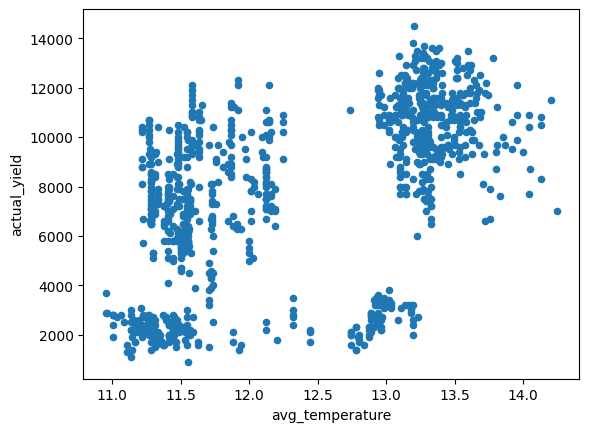

In [44]:
#Графік залежності фактичної врожайності від середньої температури
gdf.plot(x='avg_temperature', y='actual_yield', kind='scatter')

<Axes: xlabel='avg_rainfall', ylabel='actual_yield'>

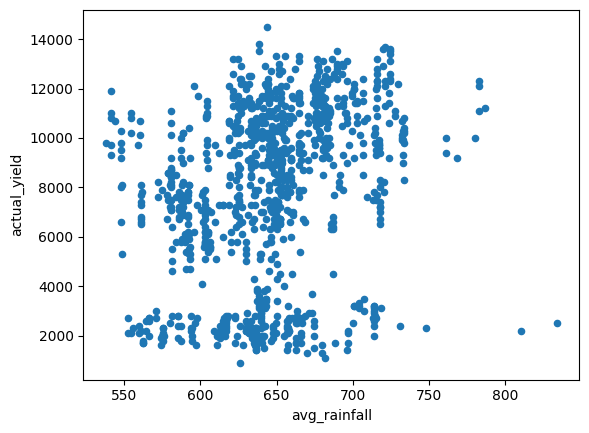

In [45]:
#Графік залежності фактичної врожайності від середньої кількості опадів
gdf.plot(x='avg_rainfall',y='actual_yield', kind='scatter')